# Code Example: Linear Regression of Tiny Mango Dataset

In [ ]:
!wget https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/main/data/mango-tiny.tsv

--2024-08-26 05:37:48--  https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/main/data/mango-tiny.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 207 [text/plain]
Saving to: ‘mango-tiny.tsv’

mango-tiny.tsv      100%[===================>]     207  --.-KB/s    in 0s      

2024-08-26 05:37:49 (8.97 MB/s) - ‘mango-tiny.tsv’ saved [207/207]



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

In [ ]:
mango_data = pd.read_csv("mango-tiny.tsv", sep="\t")

In [ ]:
mango_data

,green_rating,yellow_rating,softness,wrinkles,estimated_flavor,estimated_sweetness,rated_flavor
0,1,5,4,0,4,4,5
1,1,5,5,1,5,5,1
2,2,4,3,1,3,3,3
3,3,3,2,0,2,1,2
4,5,1,1,1,1,1,1
5,4,2,1,1,1,1,1
6,5,1,1,1,2,1,1
7,3,3,2,1,2,2,2


In [ ]:
X_mango = mango_data.drop("rated_flavor", axis=1).to_numpy()
print(X_mango.shape)
Y_mango = mango_data["rated_flavor"].to_numpy()
print(Y_mango.shape)

(8, 6)
(8,)


In [ ]:
model_mango = LinearRegression()
model_mango.fit(X_mango, Y_mango)

LinearRegression()

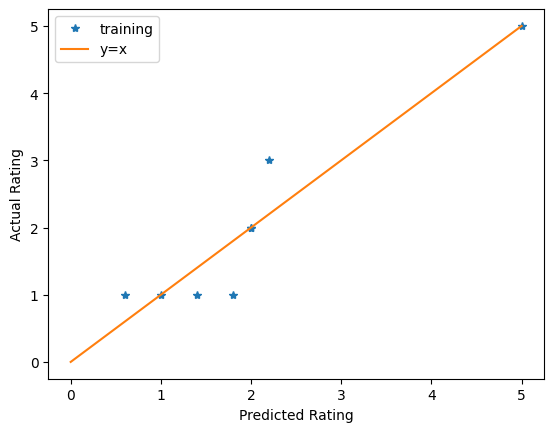

In [ ]:
Y_mango_predicted = model_mango.predict(X_mango)

plt.plot(Y_mango_predicted, Y_mango, "*", label="training")
plt.plot([0, 5], [0, 5], label="y=x")
plt.legend()
plt.xlabel("Predicted Rating")
plt.ylabel("Actual Rating")
plt.show()

It is important to note that charts like this are showing very different data than the previous ones based on just one input variable.
* In the earlier charts, the x axis was the input variable. In this chart, the x axis is the model prediction.
* In the earlier charts, the line was the model predictions for each value of the input variable. In this chart, the line is the identity y=x, because the x axis is the model prediction, and the y axis is also the prediction.

For both charts,
* Each point represents a single data point.
  The point's vertical position represents its actual value, and its relative position above or below the line is its residual.
* An accurate model will have all the points clustered close to the line.

If you observe the model making inaccurate predictions on the left, for the earlier charts that means the model is making mistakes when the input value is low, while for this chart it means the model is making mistakes when its prediction is low.
Similarly, if you observe the model making inaccurate predictions on the right, for the earlier charts that means the model is making mistakes when the input value is high, while for this chart it means the model is making mistakes when its prediction is high.